Implementar el Explorador Visual de Géneros
1. Recopilar los Géneros de los Libros
En tu dataframe ya tienes una columna de géneros. Puedes hacer un análisis para contar cuántos libros pertenecen a cada género.
Si tus libros pertenecen a múltiples géneros, puedes separar los géneros (usando .explode() en pandas) y contar las apariciones de cada uno.

In [3]:
import pandas as pd

df = pd.read_csv("../data/df_images.csv")

In [35]:
import ast

# Convertir las cadenas que parecen listas en listas reales
df['Genres'] = df['Genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Ahora puedes explotar la columna para separar los géneros
df_exploded = df.explode('Genres')

# Verificar el conteo de géneros
genre_counts = df_exploded['Genres'].value_counts()

print(genre_counts)


Genres
Fiction                         5700
Nonfiction                      2330
Fantasy                         2195
Classics                        2123
Romance                         1558
                                ... 
Serbian Literature                 1
Christian Historical Fiction       1
Womens Studies                     1
Star Trek                          1
New Adult Romance                  1
Name: count, Length: 617, dtype: int64


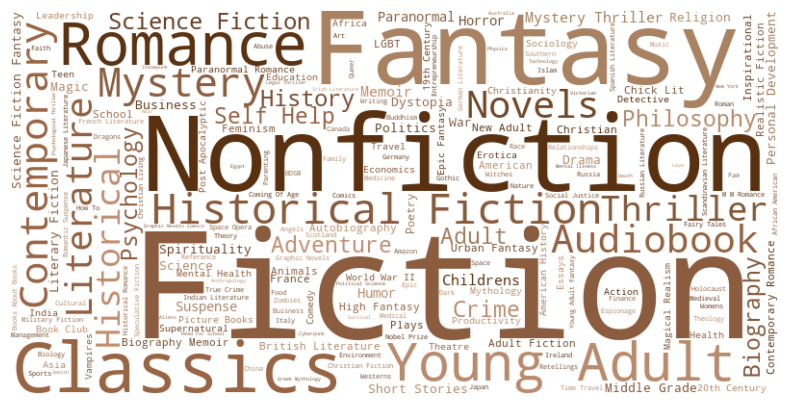

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Crear un colormap personalizado con tonos beige y marrón claro
colors = ["#9c6644", "#7f5539", "#582f0e", "#b08968", "#c38e70"]  # Colores en hexadecimal
custom_cmap = LinearSegmentedColormap.from_list("beige_brown", colors)

# Crear la nube de palabras con el colormap personalizado
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap=custom_cmap).generate_from_frequencies(genre_counts)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [51]:
import plotly.express as px
# Asegúrate de que la columna 'Num_Ratings' sea numérica
df['Num_Ratings'] = pd.to_numeric(df['Num_Ratings'], errors='coerce')

# Filtrar los libros con más de 20,000 valoraciones
popular_books = df[df['Num_Ratings'] > 20000]

# Mantener solo la primera aparición de cada título
popular_books_first = popular_books.loc[popular_books.groupby('Book').head(1).index]

# Excluir 'Hungerspelen'
popular_books_first = popular_books_first[popular_books_first['Book'] != 'Hungerspelen (The Hunger Games, #1)']

# Obtener los 10 libros más valorados
popular_books_first = popular_books_first.nlargest(10, 'Num_Ratings')

# Definir la secuencia de colores marrones
colors = ["#9c6644", "#7f5539", "#582f0e", "#b08968", "#c38e70"]

# Crear gráfico de barras interactivo con leyenda
fig = px.bar(popular_books_first, 
             x='Book', 
             y='Num_Ratings', 
             title="Libros con Más Valoraciones",
             labels={'Num_Ratings': 'Número de Valoraciones', 'Title': 'Título del Libro'},
             color='Book',  # Asigna el color por título para la leyenda
             color_discrete_sequence=colors)  # Aplica los colores personalizados

# Mostrar el gráfico
fig.show()
